In [1]:
# Multilayer Perceptron (MLP)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the MLP classifier with specified parameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='tanh', solver='adam', alpha=0.0001, learning_rate='constant', learning_rate_init=0.001, random_state=42)

# Train the classifier on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)


Validation Accuracy: 91.88%

Validation Confusion Matrix:
[[15  1  0  0  0  0  5]
 [ 0 77  3  3  1  3  2]
 [ 0  1 49  0  0  0  0]
 [ 0  2  0 40  1  0  0]
 [ 0  0  0  0 68  0  0]
 [ 0  0  0  0  0 28  0]
 [ 0  2  0  1  1  0 17]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.71      0.83        21
   Epithermal       0.93      0.87      0.90        89
          MVT       0.94      0.98      0.96        50
Metamorphosed       0.91      0.93      0.92        43
        SEDEX       0.96      1.00      0.98        68
        Skarn       0.90      1.00      0.95        28
         Vein       0.71      0.81      0.76        21

     accuracy                           0.92       320
    macro avg       0.91      0.90      0.90       320
 weighted avg       0.92      0.92      0.92       320

Test Accuracy: 93.12%

Test Confusion Matrix:
[[25  2  0  0  1  0  1]
 [ 0 52  0  5  2  1  1]
 [ 0  0 43  0  0  0  0]
 [ 0  0  0 4

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 100, 50), (50, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300, 500]
}

# Initialize the MLP classifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV with the MLP classifier and the parameter grid
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the classifier with GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best parameters to initialize the final model
best_mlp_classifier = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_mlp_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = best_mlp_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.9s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.9s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   3.2s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   3.2s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   3.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   3.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.1s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.2s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.1s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   2.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   2.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.9s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   3.2s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.4s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_si

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.1s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   2.2s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.9s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.2s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001,

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.4s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.6s[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.6s

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=300, solver=adam; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   2.3s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.9s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   1.0s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=sgd; total time=   0.7s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=300, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.5s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_si

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=300, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, max_iter=500, solver=adam; total time=   1.2s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   0.8s


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.9s
Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Validation Accuracy: 91.88%

Validation Confusion Matrix:
[[16  1  0  0  0  0  4]
 [ 0 78  2  4  1  4  0]
 [ 0  1 49  0  0  0  0]
 [ 0  3  0 39  1  0  0]
 [ 0  0  0  0 68  0  0]
 [ 0  0  0  0  0 28  0]
 [ 0  3  1  1  0  0 16]]

Validation Classification Report:
               precision    recall

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the MLP classifier with specified parameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='tanh', solver='adam', alpha=0.0001, learning_rate='constant', learning_rate_init=0.001, random_state=42)

# Train the classifier on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Compute ROC AUC score for validation set
y_val_proba = mlp_classifier.predict_proba(X_val)
y_val_bin = label_binarize(y_val, classes=mlp_classifier.classes_)
val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')

print(f'Validation AUC: {val_auc:.4f}')

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Compute ROC AUC score for test set
y_test_proba = mlp_classifier.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=mlp_classifier.classes_)
test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')

print(f'Test AUC: {test_auc:.4f}')


Validation Accuracy: 91.88%

Validation Confusion Matrix:
[[15  1  0  0  0  0  5]
 [ 0 77  3  3  1  3  2]
 [ 0  1 49  0  0  0  0]
 [ 0  2  0 40  1  0  0]
 [ 0  0  0  0 68  0  0]
 [ 0  0  0  0  0 28  0]
 [ 0  2  0  1  1  0 17]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.71      0.83        21
   Epithermal       0.93      0.87      0.90        89
          MVT       0.94      0.98      0.96        50
Metamorphosed       0.91      0.93      0.92        43
        SEDEX       0.96      1.00      0.98        68
        Skarn       0.90      1.00      0.95        28
         Vein       0.71      0.81      0.76        21

     accuracy                           0.92       320
    macro avg       0.91      0.90      0.90       320
 weighted avg       0.92      0.92      0.92       320

Validation AUC: 0.9892
Test Accuracy: 93.12%

Test Confusion Matrix:
[[25  2  0  0  1  0  1]
 [ 0 52  0  5  2  1  1]
 [ 0  0 43  0

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
import numpy as np

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Initialize the MLP classifier with specified parameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='tanh', solver='adam', alpha=0.0001, learning_rate='constant', learning_rate_init=0.001, random_state=42)

# Initialize KFold cross-validator with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
confusion_matrices = []
classification_reports = []
auc_list = []

# Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the classifier on the training data
    mlp_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = mlp_classifier.predict(X_val)
    y_val_proba = mlp_classifier.predict_proba(X_val)

    # Evaluate the model on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)
    val_classification_rep = classification_report(y_val, y_val_pred)
    y_val_bin = label_binarize(y_val, classes=mlp_classifier.classes_)
    val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')

    # Store metrics
    accuracy_list.append(val_accuracy)
    confusion_matrices.append(val_conf_matrix)
    classification_reports.append(val_classification_rep)
    auc_list.append(val_auc)

# Calculate average metrics
avg_accuracy = np.mean(accuracy_list)
avg_auc = np.mean(auc_list)

# Print the average metrics
print(f'Average Validation Accuracy: {avg_accuracy*100:.2f}%')
print(f'Average Validation AUC: {avg_auc:.4f}')
print('\nConfusion Matrices for each fold:')
for i, conf_matrix in enumerate(confusion_matrices):
    print(f'Fold {i+1}:')
    print(conf_matrix)

print('\nClassification Reports for each fold:')
for i, class_report in enumerate(classification_reports):
    print(f'Fold {i+1}:')
    print(class_report)

# Once the model is finalized after validation, evaluate it on the test set
# (Use the last fold for this purpose if needed or train again on full data)
mlp_classifier.fit(X, y)  # Optionally retrain on the full dataset

y_test_pred = mlp_classifier.predict(X_val)
y_test_proba = mlp_classifier.predict_proba(X_val)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_val, y_test_pred)
test_conf_matrix = confusion_matrix(y_val, y_test_pred)
test_classification_rep = classification_report(y_val, y_test_pred)
test_auc = roc_auc_score(y_val_bin, y_test_proba, average='macro')

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)
print(f'Test AUC: {test_auc:.4f}')


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Validation Accuracy: 94.37%
Average Validation AUC: 0.9955

Confusion Matrices for each fold:
Fold 1:
[[13  0  0  0  1  0  1]
 [ 0 31  0  0  1  1  0]
 [ 0  1 30  0  0  0  0]
 [ 0  0  0 24  0  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  1  0  0  0 17  0]
 [ 0  2  0  0  0  0  6]]
Fold 2:
[[14  0  0  0  0  0  0]
 [ 0 32  0  1  0  1  1]
 [ 0  0 18  0  1  0  0]
 [ 0  2  0 18  0  0  0]
 [ 1  0  0  0 43  0  0]
 [ 0  1  0  0  0 15  0]
 [ 0  1  0  0  0  0 11]]
Fold 3:
[[10  0  0  0  0  0  0]
 [ 0 34  1  2  0  2  0]
 [ 0  0 23  0  0  0  0]
 [ 0  0  0 19  1  0  0]
 [ 0  0  0  0 43  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  3  0  1  1  0  2]]
Fold 4:
[[10  0  0  0  0  0  1]
 [ 0 41  0  0  2  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  0 17  0]
 [ 1  2  0  0  0  0 12]]
Fold 5:
[[15  0  0  0  0  0  0]
 [ 0 32  0  0  0  2  0]
 [ 0  0 34  0  0  0  0]
 [ 0  1  0 27  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 18  0]
 [ 1  2  0  1  0  0  3]]
Fold 6:
[[ 5 

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Accuracy: 91.88%

Validation Confusion Matrix:
[[15  1  0  0  0  0  5]
 [ 0 77  3  3  1  3  2]
 [ 0  1 49  0  0  0  0]
 [ 0  2  0 40  1  0  0]
 [ 0  0  0  0 68  0  0]
 [ 0  0  0  0  0 28  0]
 [ 0  2  0  1  1  0 17]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.71      0.83        21
   Epithermal       0.93      0.87      0.90        89
          MVT       0.94      0.98      0.96        50
Metamorphosed       0.91      0.93      0.92        43
        SEDEX       0.96      1.00      0.98        68
        Skarn       0.90      1.00      0.95        28
         Vein       0.71      0.81      0.76        21

     accuracy                           0.92       320
    macro avg       0.91      0.90      0.90       320
 weighted avg       0.92      0.92      0.92       320



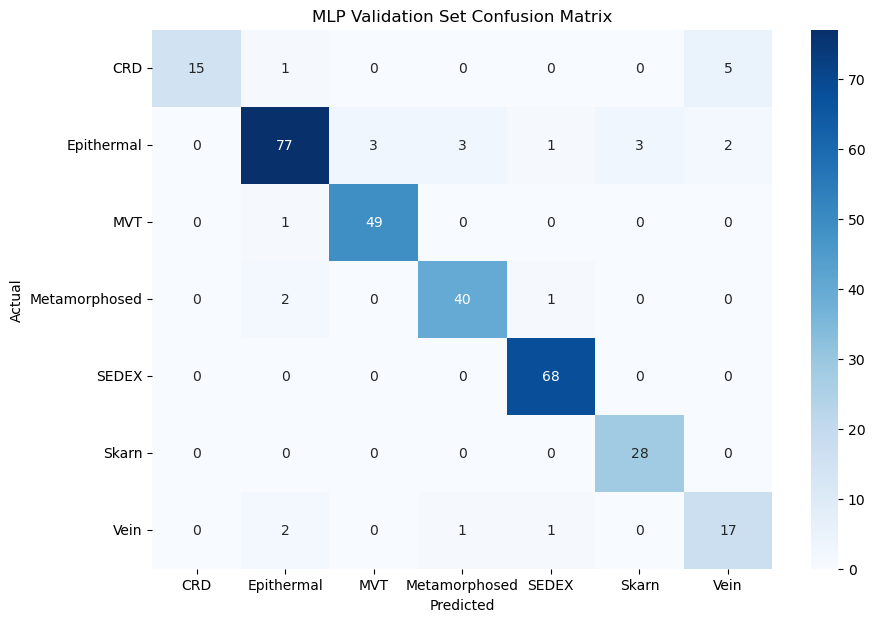

Test Accuracy: 93.12%

Test Confusion Matrix:
[[25  2  0  0  1  0  1]
 [ 0 52  0  5  2  1  1]
 [ 0  0 43  0  0  0  0]
 [ 0  0  0 40  0  0  0]
 [ 1  0  0  0 84  0  0]
 [ 0  1  0  0  0 39  1]
 [ 0  6  0  0  0  0 15]]

Test Classification Report:
               precision    recall  f1-score   support

          CRD       0.96      0.86      0.91        29
   Epithermal       0.85      0.85      0.85        61
          MVT       1.00      1.00      1.00        43
Metamorphosed       0.89      1.00      0.94        40
        SEDEX       0.97      0.99      0.98        85
        Skarn       0.97      0.95      0.96        41
         Vein       0.83      0.71      0.77        21

     accuracy                           0.93       320
    macro avg       0.93      0.91      0.92       320
 weighted avg       0.93      0.93      0.93       320



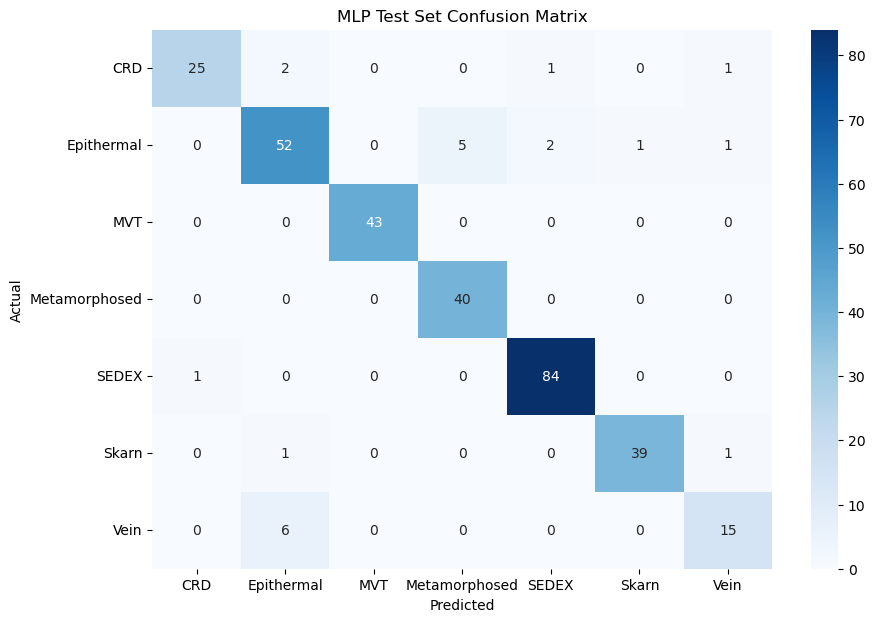

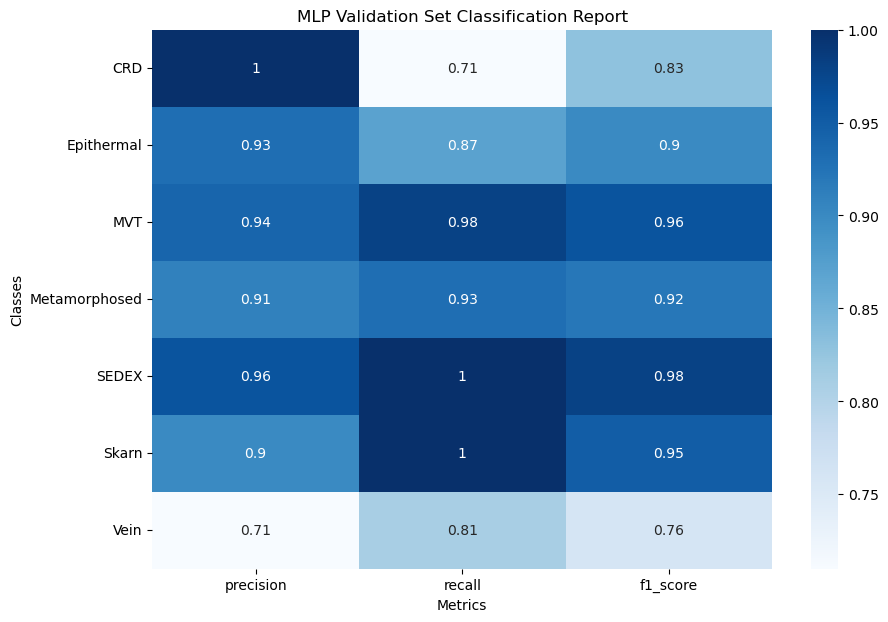

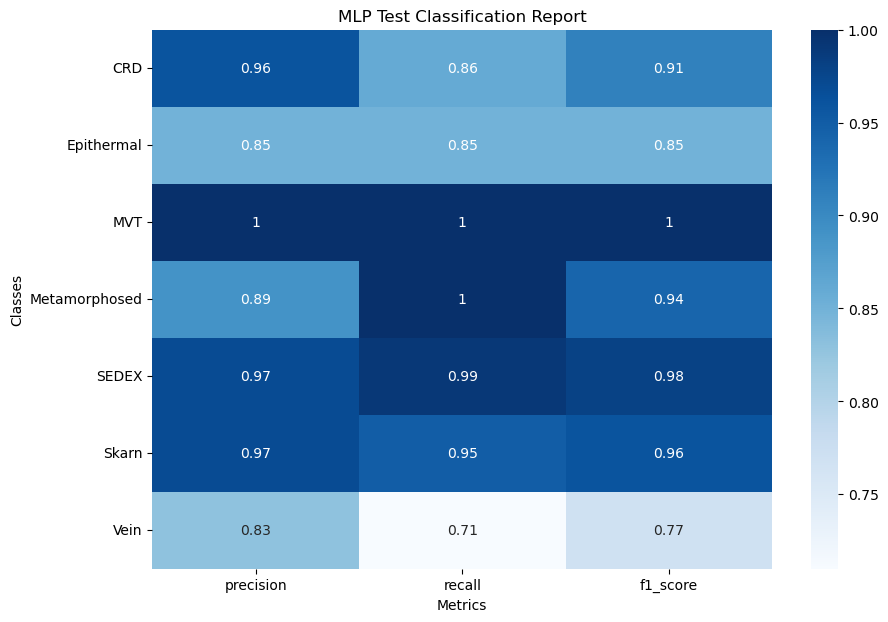

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the X DataFrame
X = imputer.fit_transform(X)

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the MLP classifier with specified parameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='tanh', solver='adam', alpha=0.0001, learning_rate='constant', learning_rate_init=0.001, random_state=42)

# Train the classifier on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = mlp_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Plot confusion matrix heatmap for validation set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_classifier.classes_, yticklabels=mlp_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Validation Set Confusion Matrix')
plt.savefig('/home/alifian/Galena Results/MLPvc.png', dpi=1000)
plt.show()

# Make predictions on the test set
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Plot confusion matrix heatmap for test set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_classifier.classes_, yticklabels=mlp_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Test Set Confusion Matrix')
plt.savefig('/home/alifian/Galena Results/MLPtc.png', dpi=1000)
plt.show()

def classification_report_to_dataframe(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 5:  # Check if the row has the correct number of columns
            row = {'class': row_data[0], 
                   'precision': float(row_data[1]), 
                   'recall': float(row_data[2]), 
                   'f1_score': float(row_data[3]), 
                   'support': int(row_data[4])}
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe

val_classification_df = classification_report_to_dataframe(val_classification_rep)
test_classification_df = classification_report_to_dataframe(test_classification_rep)

# Plot classification report heatmap for validation set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(val_classification_df.set_index('class').iloc[:, :-1], annot=True, cmap='Blues')
plt.title('MLP Validation Set Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('/home/alifian/Galena Results/MLPvr.png', dpi=1000)
plt.show()

# Plot classification report heatmap for test set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(test_classification_df.set_index('class').iloc[:, :-1], annot=True, cmap='Blues')
plt.title('MLP Test Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('/home/alifian/Galena Results/MLPtr.png', dpi=1000)
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='tanh', solver='adam', random_state=42)

# Function to evaluate model on validation and test sets
def evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, technique_name):
    mlp_classifier.fit(X_train, y_train)
    
    # Validation set predictions and evaluation
    y_val_pred = mlp_classifier.predict(X_val)
    y_val_proba = mlp_classifier.predict_proba(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)
    val_classification_rep = classification_report(y_val, y_val_pred)
    y_val_bin = label_binarize(y_val, classes=mlp_classifier.classes_)
    val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')
    
    print(f'\nResults after applying {technique_name} on Validation Set:')
    print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
    print('Validation AUC: {:.4f}'.format(val_auc))
    print('Validation Confusion Matrix:\n', val_conf_matrix)
    print('Validation Classification Report:\n', val_classification_rep)
    
    # Test set predictions and evaluation
    y_test_pred = mlp_classifier.predict(X_test)
    y_test_proba = mlp_classifier.predict_proba(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_rep = classification_report(y_test, y_test_pred)
    y_test_bin = label_binarize(y_test, classes=mlp_classifier.classes_)
    test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')
    
    print(f'\nResults after applying {technique_name} on Test Set:')
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    print('Test AUC: {:.4f}'.format(test_auc))
    print('Test Confusion Matrix:\n', test_conf_matrix)
    print('Test Classification Report:\n', test_classification_rep)
    print('--------------------------------------------------------')

# 1. Apply SMOTE and evaluate
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
evaluate_model(X_train_smote, y_train_smote, X_val, y_val, X_test, y_test, 'SMOTE')

# 2. Apply RUC (Random Under-Sampling) and evaluate
ruc = RandomUnderSampler(random_state=42)
X_train_ruc, y_train_ruc = ruc.fit_resample(X_train, y_train)
evaluate_model(X_train_ruc, y_train_ruc, X_val, y_val, X_test, y_test, 'Random Under-Sampling (RUC)')

# 3. Evaluate original (no resampling)
evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, 'Original (No Resampling)')


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Results after applying SMOTE on Validation Set:
Validation Accuracy: 92.19%
Validation AUC: 0.9888
Validation Confusion Matrix:
 [[17  1  0  0  0  0  3]
 [ 3 75  2  2  1  3  3]
 [ 0  1 49  0  0  0  0]
 [ 0  2  0 40  1  0  0]
 [ 0  0  0  0 68  0  0]
 [ 0  0  0  0  0 28  0]
 [ 0  2  0  1  0  0 18]]
Validation Classification Report:
                precision    recall  f1-score   support

          CRD       0.85      0.81      0.83        21
   Epithermal       0.93      0.84      0.88        89
          MVT       0.96      0.98      0.97        50
Metamorphosed       0.93      0.93      0.93        43
        SEDEX       0.97      1.00      0.99        68
        Skarn       0.90      1.00      0.95        28
         Vein       0.75      0.86      0.80        21

     accuracy                           0.92       320
    macro avg       0.90      0.92      0.91       320
 weighted avg       0.92      0.92      0.92       320


Results after applying SMOTE on Test Set:
Test Accuracy: 

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Results after applying Random Under-Sampling (RUC) on Validation Set:
Validation Accuracy: 81.25%
Validation AUC: 0.9733
Validation Confusion Matrix:
 [[16  0  0  0  0  0  5]
 [ 1 56  9 10  5  5  3]
 [ 0  1 46  0  2  0  1]
 [ 0  8  0 33  2  0  0]
 [ 0  2  0  0 66  0  0]
 [ 0  1  0  0  0 27  0]
 [ 0  2  2  1  0  0 16]]
Validation Classification Report:
                precision    recall  f1-score   support

          CRD       0.94      0.76      0.84        21
   Epithermal       0.80      0.63      0.70        89
          MVT       0.81      0.92      0.86        50
Metamorphosed       0.75      0.77      0.76        43
        SEDEX       0.88      0.97      0.92        68
        Skarn       0.84      0.96      0.90        28
         Vein       0.64      0.76      0.70        21

     accuracy                           0.81       320
    macro avg       0.81      0.83      0.81       320
 weighted avg       0.81      0.81      0.81       320


Results after applying Random Under

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='tanh', solver='adam', random_state=42)

# Function to evaluate model using 10-fold cross-validation
def evaluate_model_kfold(X, y, technique_name):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    val_accuracies = []
    val_aucs = []
    test_accuracies = []
    test_aucs = []
    
    fold = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_val_test = X[train_index], X[test_index]
        y_train, y_val_test = y[train_index], y[test_index]
        
        # Further split into validation and test sets
        X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)
        
        # Train the model
        mlp_classifier.fit(X_train, y_train)
        
        # Validation set predictions and evaluation
        y_val_pred = mlp_classifier.predict(X_val)
        y_val_proba = mlp_classifier.predict_proba(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        y_val_bin = label_binarize(y_val, classes=mlp_classifier.classes_)
        val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')
        
        val_accuracies.append(val_accuracy)
        val_aucs.append(val_auc)
        
        # Test set predictions and evaluation
        y_test_pred = mlp_classifier.predict(X_test)
        y_test_proba = mlp_classifier.predict_proba(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        y_test_bin = label_binarize(y_test, classes=mlp_classifier.classes_)
        test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')
        
        test_accuracies.append(test_accuracy)
        test_aucs.append(test_auc)
        
        print(f'\nFold {fold} Results after applying {technique_name}:')
        print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
        print('Validation AUC: {:.4f}'.format(val_auc))
        print('Test Accuracy: {:.2f}%'.format(test_accuracy*100))
        print('Test AUC: {:.4f}'.format(test_auc))
        print('--------------------------------------------------------')
        fold += 1
    
    print(f'\nAverage Results after applying {technique_name} across 10 folds:')
    print(f'Average Validation Accuracy: {np.mean(val_accuracies)*100:.2f}%')
    print(f'Average Validation AUC: {np.mean(val_aucs):.4f}')
    print(f'Average Test Accuracy: {np.mean(test_accuracies)*100:.2f}%')
    print(f'Average Test AUC: {np.mean(test_aucs):.4f}')
    print('============================================================')

# 1. Apply SMOTE and evaluate
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
evaluate_model_kfold(X_smote, y_smote, 'SMOTE')

# 2. Apply RUC (Random Under-Sampling) and evaluate
ruc = RandomUnderSampler(random_state=42)
X_ruc, y_ruc = ruc.fit_resample(X, y)
evaluate_model_kfold(X_ruc, y_ruc, 'Random Under-Sampling (RUC)')

# 3. Evaluate original (no resampling)
evaluate_model_kfold(X, y, 'Original (No Resampling)')



Fold 1 Results after applying SMOTE:
Validation Accuracy: 96.85%
Validation AUC: 0.9989
Test Accuracy: 96.85%
Test AUC: 0.9992
--------------------------------------------------------

Fold 2 Results after applying SMOTE:
Validation Accuracy: 96.06%
Validation AUC: 0.9991
Test Accuracy: 97.64%
Test AUC: 0.9990
--------------------------------------------------------

Fold 3 Results after applying SMOTE:
Validation Accuracy: 99.21%
Validation AUC: 0.9998
Test Accuracy: 97.64%
Test AUC: 0.9984
--------------------------------------------------------

Fold 4 Results after applying SMOTE:
Validation Accuracy: 95.28%
Validation AUC: 0.9982
Test Accuracy: 96.06%
Test AUC: 0.9908
--------------------------------------------------------

Fold 5 Results after applying SMOTE:
Validation Accuracy: 98.41%
Validation AUC: 0.9995
Test Accuracy: 98.43%
Test AUC: 1.0000
--------------------------------------------------------

Fold 6 Results after applying SMOTE:
Validation Accuracy: 99.21%
Validatio

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 10 Results after applying SMOTE:
Validation Accuracy: 94.44%
Validation AUC: 0.9967
Test Accuracy: 96.85%
Test AUC: 0.9986
--------------------------------------------------------

Average Results after applying SMOTE across 10 folds:
Average Validation Accuracy: 96.68%
Average Validation AUC: 0.9984
Average Test Accuracy: 96.85%
Average Test AUC: 0.9978


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 1 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 94.44%
Validation AUC: 0.9968
Test Accuracy: 89.19%
Test AUC: 0.9931
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 2 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 88.89%
Validation AUC: 0.9880
Test Accuracy: 94.59%
Test AUC: 0.9978
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 3 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 86.11%
Validation AUC: 0.9864
Test Accuracy: 89.19%
Test AUC: 0.9855
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 4 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 88.89%
Validation AUC: 0.9872
Test Accuracy: 89.19%
Test AUC: 0.9964
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 5 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 94.44%
Validation AUC: 0.9982
Test Accuracy: 89.19%
Test AUC: 0.9823
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 6 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 94.44%
Validation AUC: 0.9940
Test Accuracy: 94.59%
Test AUC: 0.9989
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 7 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 100.00%
Validation AUC: 1.0000
Test Accuracy: 91.89%
Test AUC: 0.9739
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 8 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 91.67%
Validation AUC: 0.9863
Test Accuracy: 91.89%
Test AUC: 0.9891
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 9 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 100.00%
Validation AUC: 1.0000
Test Accuracy: 94.44%
Test AUC: 0.9981
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 10 Results after applying Random Under-Sampling (RUC):
Validation Accuracy: 94.44%
Validation AUC: 0.9799
Test Accuracy: 88.89%
Test AUC: 0.9815
--------------------------------------------------------

Average Results after applying Random Under-Sampling (RUC) across 10 folds:
Average Validation Accuracy: 93.33%
Average Validation AUC: 0.9917
Average Test Accuracy: 91.31%
Average Test AUC: 0.9897


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 1 Results after applying Original (No Resampling):
Validation Accuracy: 90.00%
Validation AUC: 0.9922
Test Accuracy: 90.00%
Test AUC: 0.9940
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 2 Results after applying Original (No Resampling):
Validation Accuracy: 92.50%
Validation AUC: 0.9909
Test Accuracy: 91.25%
Test AUC: 0.9924
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 3 Results after applying Original (No Resampling):
Validation Accuracy: 92.50%
Validation AUC: 0.9960
Test Accuracy: 92.50%
Test AUC: 0.9932
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 4 Results after applying Original (No Resampling):
Validation Accuracy: 96.25%
Validation AUC: 0.9998
Test Accuracy: 95.00%
Test AUC: 0.9982
--------------------------------------------------------

Fold 5 Results after applying Original (No Resampling):
Validation Accuracy: 95.00%
Validation AUC: 0.9975
Test Accuracy: 97.50%
Test AUC: 0.9999
--------------------------------------------------------


/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Fold 6 Results after applying Original (No Resampling):
Validation Accuracy: 97.50%
Validation AUC: 0.9981
Test Accuracy: 93.75%
Test AUC: 0.9982
--------------------------------------------------------

Fold 7 Results after applying Original (No Resampling):
Validation Accuracy: 93.75%
Validation AUC: 0.9843
Test Accuracy: 93.75%
Test AUC: 0.9985
--------------------------------------------------------

Fold 8 Results after applying Original (No Resampling):
Validation Accuracy: 90.00%
Validation AUC: 0.9938
Test Accuracy: 95.00%
Test AUC: 0.9987
--------------------------------------------------------

Fold 9 Results after applying Original (No Resampling):
Validation Accuracy: 96.20%
Validation AUC: 0.9986
Test Accuracy: 96.25%
Test AUC: 0.9918
--------------------------------------------------------

Fold 10 Results after applying Original (No Resampling):
Validation Accuracy: 91.14%
Validation AUC: 0.9970
Test Accuracy: 93.75%
Test AUC: 0.9831
------------------------------------

/home/alifian/.conda/envs/math-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
